<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-in-Data" data-toc-modified-id="Read-in-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read in Data</a></span></li><li><span><a href="#Final-Formatting" data-toc-modified-id="Final-Formatting-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Final Formatting</a></span></li><li><span><a href="#Read-in-Independent-Variables,-Join-tickers" data-toc-modified-id="Read-in-Independent-Variables,-Join-tickers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read in Independent Variables, Join tickers</a></span></li><li><span><a href="#Join-in-the-credit-rating-data" data-toc-modified-id="Join-in-the-credit-rating-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Join in the credit rating data</a></span></li><li><span><a href="#Generate-Model-Data" data-toc-modified-id="Generate-Model-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Generate Model Data</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Exploration</a></span></li></ul></div>

In [1]:
import pandas as pd 
import numpy as np 
import os 
import plotly.graph_objects as go
import seaborn as sns 
import matplotlib.pyplot as plt 
from tqdm import tqdm 
pd.set_option('display.max_rows', 500) 

## Read in Data

In [2]:
## Read in data and ids 

data = pd.read_csv('capiq_data/capiq data.csv') 
ids = pd.read_csv('capiq_data/capiq ids.csv') 

In [3]:
## Merge them together so we can determine the 
## company names with the data

data = data.merge(ids, how = 'outer', 
           left_on = ['CQID'], 
           right_on = ['IQID']).dropna()
data.to_csv('capiq_data/capiq_data_names.csv') 
data.head() 

,Date,Fiscal Quarter,IQ_NI_CF,IQ_TOTAL_REV,IQ_AR,IQ_GP,IQ_TOTAL_CA,IQ_TOTAL_ASSETS,IQ_AP,IQ_LT_DEBT,...,IQ_CASH_EQUIV,IQ_CASH_OPER,IQ_TOTAL_DIV_PAID_CF,IQ_CASH_FINAN,IQ_CAPITAL_LEASES,IQ_INVEST_SECURITY_CF,IQ_NI,CQID,IQID,IQ Name
0,2010-12-31,FQ42010,0.0,0.0,889.6,0.0,1673.0,14176.3,119.0,4953.5,...,338.0,0.0,0.0,0.0,0.0,0.0,0.0,IQ10081196,IQ10081196,"Fidelity National Information Services, Inc."
1,2011-03-31,FQ12011,92.8,1352.8,897.6,376.5,1644.7,14114.3,577.2,4478.2,...,384.1,260.2,-15.2,-140.1,0.0,0.0,92.8,IQ10081196,IQ10081196,"Fidelity National Information Services, Inc."
2,2011-06-30,FQ22011,123.5,1413.3,895.8,423.9,1705.6,14161.6,553.2,4322.3,...,427.3,263.3,-16.9,-157.3,0.0,0.0,123.5,IQ10081196,IQ10081196,"Fidelity National Information Services, Inc."
3,2011-09-30,FQ32011,0.0,1398.2,860.1,432.9,1604.2,13885.5,515.5,4332.9,...,386.8,0.0,0.0,0.0,0.0,0.0,136.3,IQ10081196,IQ10081196,"Fidelity National Information Services, Inc."
4,2011-12-31,FQ42011,117.0,1461.3,915.4,473.2,1674.0,13873.2,100.6,4554.6,...,415.5,372.4,-12.4,-271.3,0.0,0.0,117.0,IQ10081196,IQ10081196,"Fidelity National Information Services, Inc."


In [4]:
## Reduce to only the variables we really want. 
small_df = data[['IQ Name', 'IQID', 'Fiscal Quarter',
                 'IQ_TOTAL_REV', 'IQ_NI_CF',
                 'IQ_AR', 
                 'IQ_GP ', 
                 'IQ_TOTAL_ASSETS', 
                 'IQ_AP', 
                 'IQ_TOTAL_LIAB', 
                 'IQ_TOTAL_DEBT', 
                 'IQ_CASH_FINAN', 
                 'IQ_TOTAL_EQUITY', 
                 'IQ_CASH_EQUIV' 
                 ]]
small_df['year'] = pd.to_numeric(small_df['Fiscal Quarter'].str[-4:])
small_df['quarter'] = pd.to_numeric(small_df['Fiscal Quarter'].str[-5] )
small_df.drop(columns = ['Fiscal Quarter'], inplace = True)
small_df.drop_duplicates(subset = ['year', 'quarter', 'IQID'], keep = 'first', inplace = True)  
small_df.head()

/Users/vijayyedidi/opt/anaconda3/envs/credit/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/vijayyedidi/opt/anaconda3/envs/credit/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/vijayyedidi/opt/anaconda3/envs/credit/lib/python3.6/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

,IQ Name,IQID,IQ_TOTAL_REV,IQ_NI_CF,IQ_AR,IQ_GP,IQ_TOTAL_ASSETS,IQ_AP,IQ_TOTAL_LIAB,IQ_TOTAL_DEBT,IQ_CASH_FINAN,IQ_TOTAL_EQUITY,IQ_CASH_EQUIV,year,quarter
0,"Fidelity National Information Services, Inc.",IQ10081196,0.0,0.0,889.6,0.0,14176.3,119.0,7614.7,5210.4,0.0,6561.6,338.0,2010,4
1,"Fidelity National Information Services, Inc.",IQ10081196,1352.8,92.8,897.6,376.5,14114.3,577.2,7383.8,5069.6,-140.1,6730.5,384.1,2011,1
2,"Fidelity National Information Services, Inc.",IQ10081196,1413.3,123.5,895.8,423.9,14161.6,553.2,7267.2,4939.3,-157.3,6894.4,427.3,2011,2
3,"Fidelity National Information Services, Inc.",IQ10081196,1398.2,0.0,860.1,432.9,13885.5,515.5,7134.6,4917.5,0.0,6750.9,386.8,2011,3
4,"Fidelity National Information Services, Inc.",IQ10081196,1461.3,117.0,915.4,473.2,13873.2,100.6,7222.0,4813.8,-271.3,6651.2,415.5,2011,4


In [5]:
## See any zero variables 
Zeros = lambda df, col: df[df[col] == 0][['IQ Name', 'year', 'quarter', col]]
check_zeros = {}
for col in small_df.columns[2:-2]: 
    '''Looking at zero values. If there are more than 5 zeros in a column we're going
    to have to take a closer look''' 

    
    df = Zeros(small_df, col).groupby(['IQ Name']).count() 
    df = df[df[col] > 50]
    check_zeros[col] = df
    print('For {} we have {} '.format(col, df.shape[0]))

print(small_df.shape) 

For IQ_TOTAL_REV we have 0 
For IQ_NI_CF we have 0 
For IQ_AR we have 24 
For IQ_GP  we have 0 
For IQ_TOTAL_ASSETS we have 0 
For IQ_AP we have 7 
For IQ_TOTAL_LIAB we have 0 
For IQ_TOTAL_DEBT we have 10 
For IQ_CASH_FINAN we have 0 
For IQ_TOTAL_EQUITY we have 0 
For IQ_CASH_EQUIV we have 0 
(30170, 15)


In [6]:
small_df.to_csv('small_df.csv') 

## Final Formatting

In [7]:
## Read in Data

ids= pd.DataFrame() 
## Read in ticker symbols
for i in range(1, 6): 
    df = pd.read_excel('capiq_data/in_process_ids/ids {}.xlsx'.format(i),
                       engine='openpyxl')[['ID', 'IQID', 'IQ Name']]
    ids = pd.concat([ids, df]) 

## See if there are any duplicates 
print(ids.duplicated().sum()) 
## See if there are any nulls 
print(ids.isna().sum()) 
ids.head() 

0
ID         0
IQID       0
IQ Name    0
dtype: int64


,ID,IQID,IQ Name
0,MMM,IQ289194,3M Company
1,ABT,IQ247483,Abbott Laboratories
2,ABBV,IQ141885706,AbbVie Inc.
3,ABMD,IQ247589,"Abiomed, Inc."
4,ACN,IQ972190,Accenture plc


## Read in Independent Variables, Join tickers

In [8]:
## Join IQID for inds so we can see the Ticker and the name 

ind_df = small_df

ind_df = ind_df.merge(ids, on = ['IQID', 'IQ Name']) 
ind_df.drop([ 'IQ Name', 'IQID', 
            'quarter'], axis = 1, inplace = True) 

## The data is quarterly, but we need to lok at it annually. 
## This means we have to take the mean of the data for all the quarters 
ind_df = ind_df.groupby(['year', 'ID']).mean().reset_index()
                      
ind_df.head() 

,year,ID,IQ_TOTAL_REV,IQ_NI_CF,IQ_AR,IQ_GP,IQ_TOTAL_ASSETS,IQ_AP,IQ_TOTAL_LIAB,IQ_TOTAL_DEBT,IQ_CASH_FINAN,IQ_TOTAL_EQUITY,IQ_CASH_EQUIV
0,1995,CZR,36.380500,5.98350,0.962750,16.722000,53.898,0.819750,34.04225,30.907500,6.802000,19.85575,1.5305
1,1995,HII,455.500000,7.50000,165.000000,33.500000,690.000,83.000000,554.00000,180.000000,-13.500000,136.00000,1.0000
2,1996,CZR,37.662500,4.61575,3.078750,17.350750,171.045,2.952000,104.33325,124.623250,-2.300500,86.56750,4.1460
3,1996,HII,467.500000,13.75000,210.750000,35.250000,740.500,64.000000,599.00000,352.750000,43.250000,209.50000,0.5000
4,1996,HLT,994.333333,15.00000,133.333333,255.666667,4543.300,270.466667,2559.00000,1655.966667,65.333333,1984.30000,296.6000


## Join in the credit rating data 
we want an inner join so we can only keep the company we have the credit rating for

In [9]:
## Join in the credit Ratings Data
credit_ratings = pd.read_csv('credit.csv')[['Year', 'TickerSymbol',
                                            'DomesticLTICRSPMthlyAvg']]
credit_ratings.rename({'DomesticLTICRSPMthlyAvg': 'rating'}, inplace = True, axis = 1)  

## Add credit ratings to df  
tot_df = credit_ratings.merge(ind_df, how = 'inner', 
                             left_on = ['Year', 'TickerSymbol'], 
                             right_on = ['year', 'ID'])
tot_df.drop(['Year', 'TickerSymbol'], axis = 1, inplace = True) 


## Normalize by Assets by Company
tot_df.head()
norm_tot_df = tot_df.drop(['rating', 'year', 'ID', 'IQ_TOTAL_ASSETS'], axis = 1) 
norm_tot_df = norm_tot_df.div(tot_df['IQ_TOTAL_ASSETS'], axis = 0)
tot_df = pd.concat([tot_df[['rating', 'year', 'ID', 'IQ_TOTAL_ASSETS']], 
                        norm_tot_df], axis = 1) 

tot_df.head() 

,rating,year,ID,IQ_TOTAL_ASSETS,IQ_TOTAL_REV,IQ_NI_CF,IQ_AR,IQ_GP,IQ_AP,IQ_TOTAL_LIAB,IQ_TOTAL_DEBT,IQ_CASH_FINAN,IQ_TOTAL_EQUITY,IQ_CASH_EQUIV
0,12.000000,2000,AAL,26213.00,0.185366,0.001793,0.049708,0.056804,0.048335,0.726243,0.239194,0.014687,0.273757,0.003395
1,12.666667,2001,AAL,30054.25,0.157740,-0.014657,0.050276,0.033889,0.051191,0.787243,0.281433,0.035028,0.212757,0.005058
2,14.583333,2002,AAL,31230.25,0.139448,-0.028106,0.047118,0.037640,0.044660,0.913826,0.382025,0.020061,0.086174,0.004451
3,18.250000,2003,AAL,29394.75,0.148326,-0.010444,0.029146,0.034641,0.035670,1.009177,0.461341,0.000510,-0.009177,0.005035
4,18.000000,2004,AAL,29496.25,0.158029,-0.006450,0.030707,0.039259,0.035606,1.009764,0.487706,0.002805,-0.009764,0.004958


In [10]:
tot_df_clean = pd.DataFrame() 



for ticker in tqdm(tot_df['ID'].unique()): 
    
    
    ## small df is all the rows with the ticker, sort by year 
    small_df = tot_df[tot_df['ID'] == ticker].sort_values(by = 'year',
                                                             ascending = True)
    
    
    ## Insert a lead rating column. This is the predictor column, 
    ## as we are trying to predict the credit rating for the next year
    small_df.insert(loc = 0, column = 'lead_rating', 
               value = small_df.rating.shift(-1)) 
    
    
    ## Set the index as the year and the ticker. 
    small_df.set_index(['year', 'ID'], inplace = True) 
    
    ## Take the difference between rows. We are looking to find 
    ## differences in credit rating, so we are going to compare it to 
    ## differences in dependent variables. 
    ## We can then drop the nulls. 
    small_df = small_df.diff().dropna()  
    
    ## Normalize total assets 
    assets = small_df['IQ_TOTAL_ASSETS']
    small_df['IQ_TOTAL_ASSETS'] = (assets - assets.mean()) / assets.std() 
    
    tot_df_clean = pd.concat([tot_df_clean, small_df], axis = 0) 

tot_df_clean.head() 

100%|██████████| 312/312 [00:01<00:00, 191.39it/s]


,,lead_rating,rating,IQ_TOTAL_ASSETS,IQ_TOTAL_REV,IQ_NI_CF,IQ_AR,IQ_GP,IQ_AP,IQ_TOTAL_LIAB,IQ_TOTAL_DEBT,IQ_CASH_FINAN,IQ_TOTAL_EQUITY,IQ_CASH_EQUIV
year,ID,,,,,,,,,,,,,
2001,AAL,1.916667,0.666667,1.555216,-0.027626,-0.016450,0.000568,-0.022915,0.002856,0.061000,0.042238,0.020341,-0.061000,0.001662
2002,AAL,3.666667,1.916667,0.393082,-0.018292,-0.013449,-0.003158,0.003751,-0.006531,0.126582,0.100593,-0.014968,-0.126582,-0.000607
2003,AAL,-0.250000,3.666667,-0.920027,0.008878,0.017662,-0.017971,-0.002999,-0.008991,0.095351,0.079315,-0.019550,-0.095351,0.000584
2004,AAL,0.000000,-0.250000,-0.075433,0.009703,0.003994,0.001561,0.004619,-0.000063,0.000587,0.026365,0.002295,-0.000587,-0.000077
2005,AAL,-0.583333,0.000000,-0.162531,0.018106,-0.000838,0.004899,0.003405,0.002764,0.019753,0.000184,0.001727,-0.019753,-0.000034


## Generate Model Data 

<AxesSubplot:title={'center':'Before Down-Sampling'}, ylabel='classification label'>

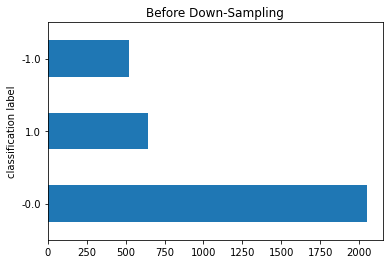

In [11]:
def LabelRating(df_np): 
    ## Convert Rating to categoritcal value 
    lead_rating = df_np.copy() 
    
    lead_rating[lead_rating == 0] = 0
    lead_rating[(lead_rating > 0) ] = 1 
    lead_rating[(lead_rating < 0) ] = -1 
    lead_rating = -lead_rating

    
    return lead_rating 


## Apply the ratings categorical values 
tot_df_clean[['lead_rating', 
              'rating']] = tot_df_clean[['lead_rating',
                                                        'rating']].apply(LabelRating)

orig_data = tot_df_clean 

## See value counts in graph form
tot_df_clean.lead_rating.value_counts().plot(kind = 'barh', ylabel = 'value counts', 
                                            xlabel = 'classification label', 
                                            title = 'Before Down-Sampling')  


<AxesSubplot:title={'center':'After Down-Sampling'}, ylabel='classification label'>

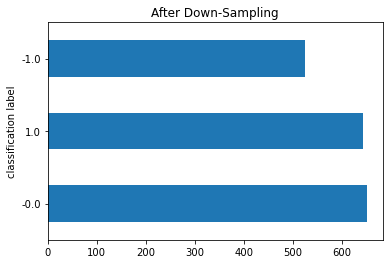

In [12]:
from sklearn.utils import resample 

## Resample the data

rating_0 = tot_df_clean[tot_df_clean.lead_rating ==0 ]
tot_df_clean_sampled = tot_df_clean[tot_df_clean.lead_rating !=0 ]
rating_0 = resample(rating_0, 
                   replace = True, 
                   n_samples = 650,
                    random_state = 123) 

tot_df_clean = pd.concat([rating_0, 
                          tot_df_clean_sampled], axis = 0) 




tot_df_clean.lead_rating.value_counts().plot(kind = 'barh', ylabel = 'value counts', 
                                            xlabel = 'classification label', 
                                            title = 'After Down-Sampling')  

In [13]:
## Order by Year 
tot_df_clean_year = tot_df_clean.reset_index() 
tot_df_clean_year.sort_values(by = 'year',
                              axis = 0, 
                             inplace = True) 
tot_df_clean_year.set_index(['year', 'ID'],
                            inplace = True) 
tot_df_clean_year.dropna().to_csv('model_data.csv') 
tot_df_clean_year.head() 

lead_rating  rating  IQ_TOTAL_ASSETS  IQ_TOTAL_REV  IQ_NI_CF  \
year ID                                                                   
2001 JPM          -1.0     1.0        -0.945447     -0.002409 -0.000409   
     F            -1.0    -1.0         0.143388     -0.042495 -0.004145   
     AKAM         -1.0    -0.0              NaN      0.068819 -1.117473   
     CHTR         -1.0    -0.0         1.445774     -0.000547 -0.001261   
     DOV          -0.0    -0.0        -0.958897     -0.013956 -0.014696   

              IQ_AR    IQ_GP      IQ_AP  IQ_TOTAL_LIAB  IQ_TOTAL_DEBT  \
year ID                                                                 
2001 JPM   0.000000 -0.002409  0.004809       0.001093      -0.005029   
     F    -0.005853 -0.008635  0.002457       0.020101       0.018932   
     AKAM  0.036566  0.020109  0.061503       0.660347       0.497948   
     CHTR  0.000173  0.003984  0.023845       0.007280       0.048779   
     DOV  -0.019740 -0.014525 -0.008472      -0.020854      -0.027863   

           IQ_CASH_FINAN  IQ_TOTAL_EQUITY  IQ_CASH_EQUIV  
year ID                                                   
2001 JPM       -0.009855        -0.001093      -0.026098  
     F         -0.015464        -0.020101       0.004941  
     AKAM       0.001225        -0.660347       0.164600  
     CHTR       0.004572        -0.007280       0.000449  
     DOV       -0.015357         0.020854       0.010926

## Data Exploration

Text(0.5, 1.0, 'Autocorrelation Matrix Between Variables')

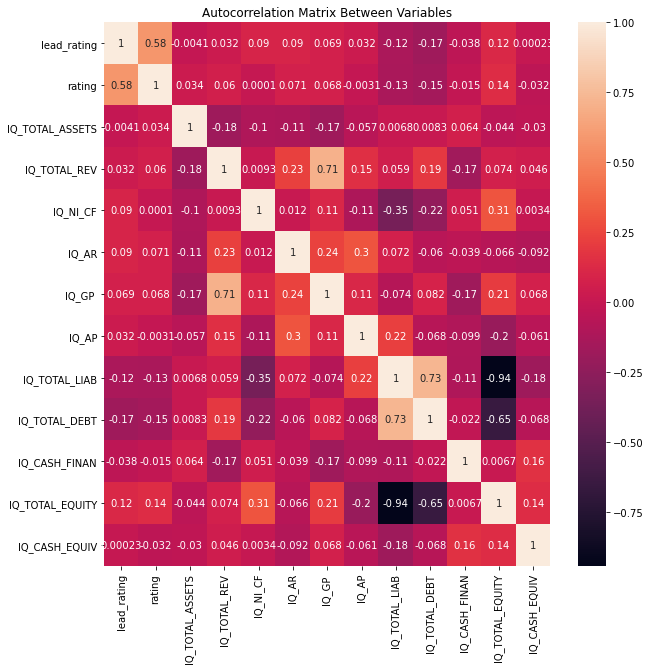

In [14]:
fig, ax = plt.subplots(figsize = (10,10)) 
fig = sns.heatmap(tot_df_clean.corr(), annot = True, 
                 ax = ax) 
fig.set_title('Autocorrelation Matrix Between Variables') 

In [15]:
tot_df_clean[tot_df_clean.columns[:8]].describe().iloc[1:]

,lead_rating,rating,IQ_TOTAL_ASSETS,IQ_TOTAL_REV,IQ_NI_CF,IQ_AR,IQ_GP,IQ_AP
mean,0.064978,0.029736,0.010192,-0.003715,0.000167,-0.001168,-0.001198,-0.000198
std,0.798874,0.697257,0.982677,0.061370,0.035069,0.016698,0.022240,0.018990
min,-1.000000,-1.000000,-2.956809,-0.990056,-1.117473,-0.143688,-0.362231,-0.161055
25%,-1.000000,-0.000000,-0.585629,-0.011889,-0.002810,-0.005165,-0.004679,-0.004515
50%,-0.000000,-0.000000,-0.112337,-0.000107,0.000530,0.000000,0.000423,0.000060
75%,1.000000,1.000000,0.583309,0.010129,0.004295,0.004341,0.004604,0.004867
max,1.000000,1.000000,3.174330,0.824944,0.480325,0.146496,0.291518,0.130401


In [16]:
tot_df_clean[tot_df_clean.columns[8:]].describe().iloc[1:]

,IQ_TOTAL_LIAB,IQ_TOTAL_DEBT,IQ_CASH_FINAN,IQ_TOTAL_EQUITY,IQ_CASH_EQUIV
mean,-0.003039,-0.003848,-0.000588,0.002327,0.001046
std,0.088881,0.070476,0.033532,0.085804,0.037808
min,-2.414229,-0.876631,-0.330005,-0.728663,-0.322301
25%,-0.024940,-0.026185,-0.010570,-0.019244,-0.010895
50%,-0.001530,-0.003744,-0.000148,0.001459,0.000910
75%,0.018767,0.017680,0.009485,0.024917,0.012633
max,0.660347,1.005794,0.336646,2.077350,0.435819


In [21]:
desc_stats = tot_df_clean.describe().iloc[1:]
fig = go.Figure() 

for i in range(0, 6): 

    fig.add_trace(go.Bar(x = desc_stats.columns, 
                    y = desc_stats.iloc[i], 
                    name = desc_stats.index[i], 
                        text = desc_stats.iloc[i], 
                        textposition = 'auto') ) 

fig.update_layout(title = 'Descriptive Stats') 

fig.show()